In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data    = pd.read_csv("test/ubuntu/individual-benchmarks.csv")
data_lg = pd.read_csv("test-lambda-groups/ubuntu/individual-benchmarks.csv")
data_pg = pd.read_csv("test-pg-lambda-groups/ubuntu/individual-benchmarks.csv")
data_r8 = pd.read_csv("test-r8/ubuntu/individual-benchmarks.csv")

In [51]:
data["transformation"] = "original"
data_lg["transformation"] = "pg_lambda_merging"
data_pg["transformation"] = "pg_shrinking_lambda_merging_optimisation"
data_r8["transformation"] = "r8_shrinking_optimisation"

In [52]:
df = pd.concat([data, data_lg, data_pg, data_r8], ignore_index=True)

In [53]:
def get_arity_from_benchmark(benchmark):
    benchmark = benchmark.replace("InstantiationsAnd", "")
    benchmark = benchmark.replace("test.MyBenchmark.emptyClosure", "")
    benchmark = benchmark.replace("Arguments3MillionCalls", "")
    try:
        arity = int(benchmark)
        return arity
    except Exception:
        return 0

In [54]:
def get_closure_size_from_benchmark(benchmark):
    benchmark = benchmark.replace("InstantiationsAnd", "")
    benchmark = benchmark.replace("test.MyBenchmark.closure", "")
    benchmark = benchmark.replace("FreeVariables3MillionCalls", "")
    benchmark = benchmark.replace("FreeVariables3MillionInstantiations", "")
    try:
        closure_size = int(benchmark)
        return closure_size
    except Exception as exc:
        return 0

In [55]:
def add_test_type(data):
    data["closure_test"] = data["benchmark"].apply(lambda val: val.startswith("test.MyBenchmark.closure") and "FreeVariables" in val)
    data["arity_test"] = data["benchmark"].apply(lambda val: val.startswith("test.MyBenchmark.emptyClosure") and "Arguments3Million" in val)
    data["instantiation_test"] = data["benchmark"].apply(lambda val: "Instantiations" in val)
    data["invocation_test"] = data["benchmark"].apply(lambda val: "Calls" in val)

In [56]:
def add_arity(data):
    data["arity"] = data["benchmark"].apply(get_arity_from_benchmark)

In [57]:
def add_closure_size(data):
    data["closure_size"] = data["benchmark"].apply(get_closure_size_from_benchmark)

In [58]:
add_test_type(df)
add_arity(df)
add_closure_size(df)

In [59]:
test_df = df.query("iteration_type == 'test'")

transformation
original                                    AxesSubplot(0.125,0.125;0.775x0.755)
pg_lambda_merging                           AxesSubplot(0.125,0.125;0.775x0.755)
pg_shrinking_lambda_merging_optimisation    AxesSubplot(0.125,0.125;0.775x0.755)
r8_shrinking_optimisation                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

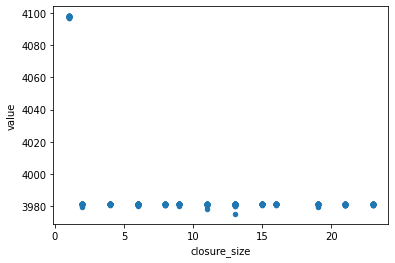

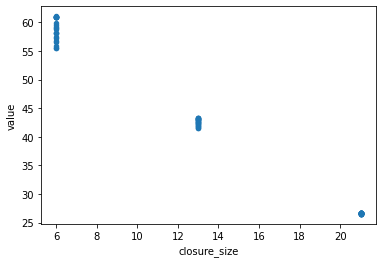

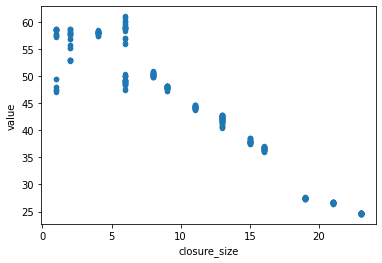

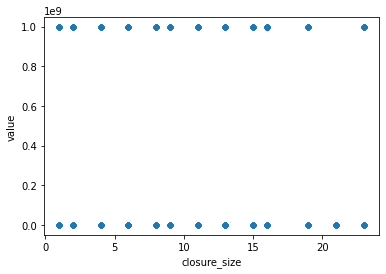

In [60]:
test_df.query("closure_test and invocation_test and not instantiation_test").groupby(by="transformation").plot.scatter(x="closure_size", y="value")

transformation
original                                    AxesSubplot(0.125,0.125;0.775x0.755)
pg_lambda_merging                           AxesSubplot(0.125,0.125;0.775x0.755)
pg_shrinking_lambda_merging_optimisation    AxesSubplot(0.125,0.125;0.775x0.755)
r8_shrinking_optimisation                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

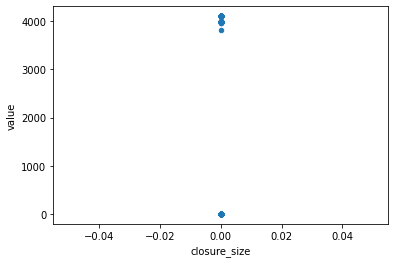

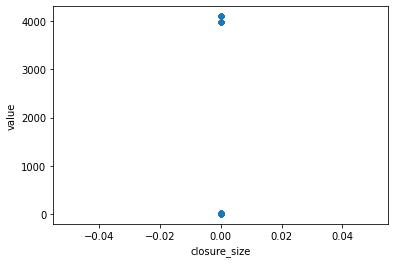

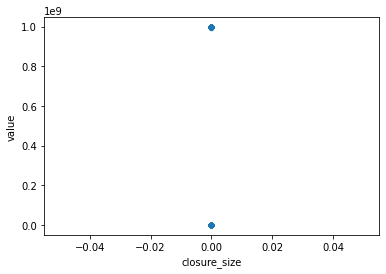

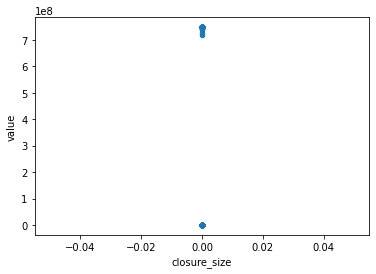

In [62]:
test_df.query("arity_test and invocation_test and not instantiation_test").groupby(by="transformation").plot.scatter(x="closure_size", y="value")

transformation
original                                    AxesSubplot(0.125,0.125;0.775x0.755)
pg_lambda_merging                           AxesSubplot(0.125,0.125;0.775x0.755)
pg_shrinking_lambda_merging_optimisation    AxesSubplot(0.125,0.125;0.775x0.755)
r8_shrinking_optimisation                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

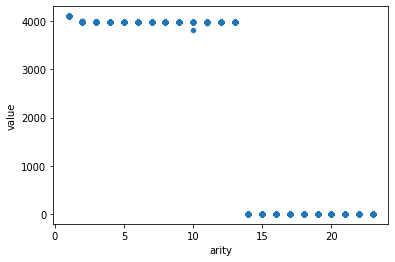

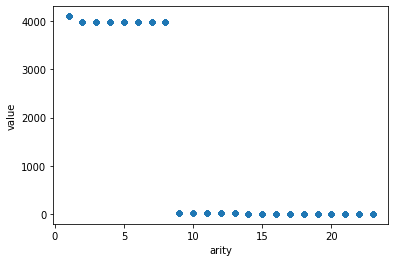

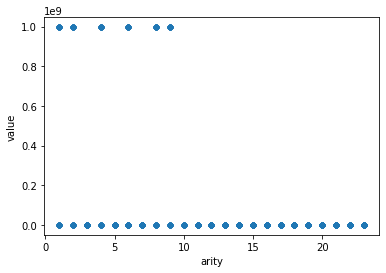

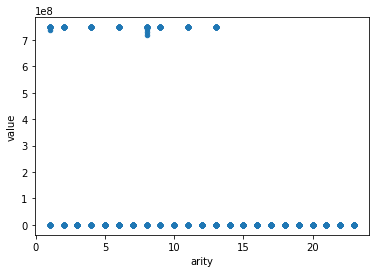

In [63]:
test_df.query("arity_test and invocation_test and not instantiation_test").groupby(by="transformation").plot.scatter(x="arity", y="value")

transformation
original                                    AxesSubplot(0.125,0.125;0.775x0.755)
pg_lambda_merging                           AxesSubplot(0.125,0.125;0.775x0.755)
pg_shrinking_lambda_merging_optimisation    AxesSubplot(0.125,0.125;0.775x0.755)
r8_shrinking_optimisation                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

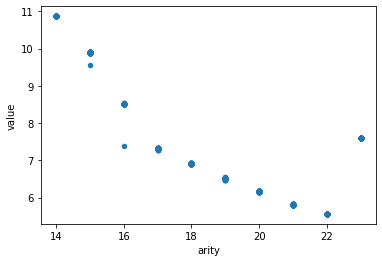

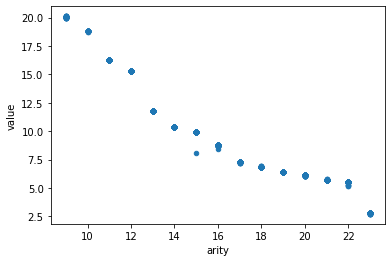

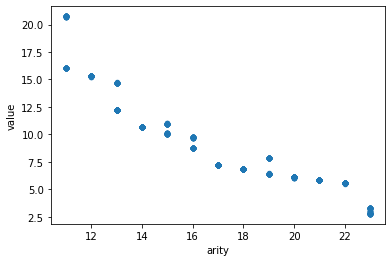

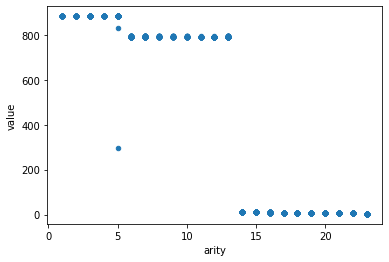

In [66]:
test_df.query("arity_test and invocation_test and not instantiation_test and value < 3000").groupby(by="transformation").plot.scatter(x="arity", y="value")

transformation
original                                    AxesSubplot(0.125,0.125;0.775x0.755)
pg_lambda_merging                           AxesSubplot(0.125,0.125;0.775x0.755)
pg_shrinking_lambda_merging_optimisation    AxesSubplot(0.125,0.125;0.775x0.755)
r8_shrinking_optimisation                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

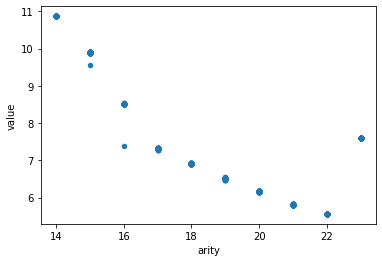

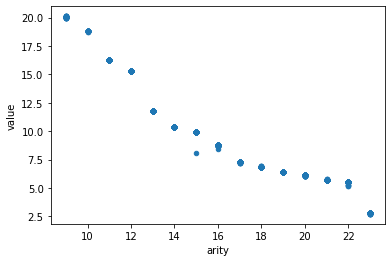

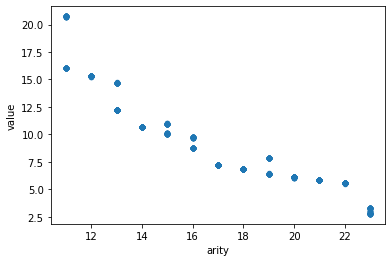

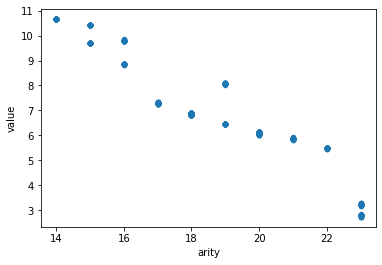

In [67]:
test_df.query("arity_test and invocation_test and not instantiation_test and value < 100").groupby(by="transformation").plot.scatter(x="arity", y="value")

transformation
original                                    AxesSubplot(0.125,0.125;0.775x0.755)
pg_lambda_merging                           AxesSubplot(0.125,0.125;0.775x0.755)
pg_shrinking_lambda_merging_optimisation    AxesSubplot(0.125,0.125;0.775x0.755)
r8_shrinking_optimisation                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

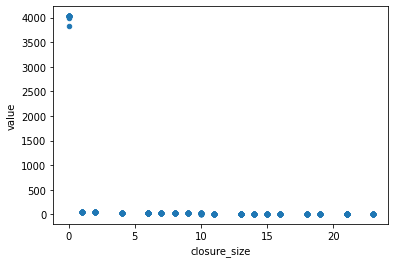

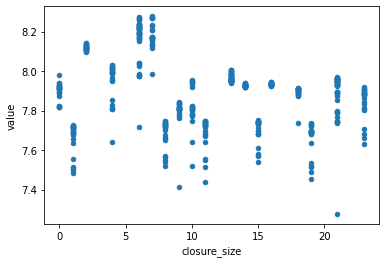

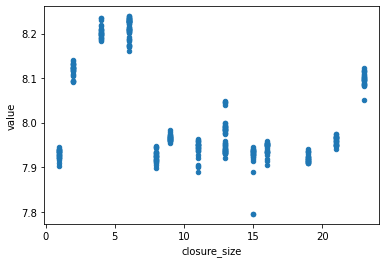

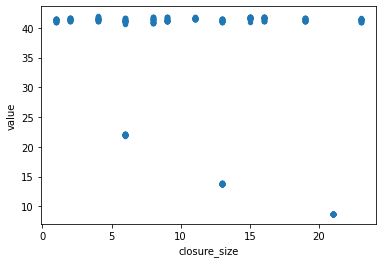

In [64]:
test_df.query("closure_test and not invocation_test and instantiation_test").groupby(by="transformation").plot.scatter(x="closure_size", y="value")